# Stocks Dataset Download per sector

In this notebook, we will show how to download the required stocks from yahoo finance that will be helpful for our stock prediction project

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [13]:
# companies contains all the companies we are dealing with in the tech
data_tech = pd.read_excel(r'Dataset_Needed\tech.xlsx')
df_tech = pd.DataFrame(data_tech, columns= ['company'])
companies_tech = df_tech.to_numpy().flatten()
companies_tech = list(dict.fromkeys(companies_tech))

# companies contains all the companies we are dealing with in the automobile
data_automobile = pd.read_excel(r'Dataset_Needed\automobile.xlsx')
df_automobile = pd.DataFrame(data_automobile, columns= ['company'])
companies_automobile = df_automobile.to_numpy().flatten()
companies_automobile = list(dict.fromkeys(companies_automobile))

# companies contains all the companies we are dealing with in the fashion
data_fashion = pd.read_excel(r'Dataset_Needed\fashion.xlsx')
df_fashion = pd.DataFrame(data_fashion, columns= ['company'])
companies_fashion = df_fashion.to_numpy().flatten()
companies_fashion = list(dict.fromkeys(companies_fashion))

# companies contains all the companies we are dealing with in the finance
data_finance = pd.read_excel(r'Dataset_Needed\finance.xlsx')
df_finance = pd.DataFrame(data_finance, columns= ['company'])
companies_finance = df_finance.to_numpy().flatten()
companies_finance = list(dict.fromkeys(companies_finance))
companies_finance.remove("Goldman Sa")

In [14]:
print(companies_tech)
print(companies_automobile)
print(companies_fashion)
print(companies_finance)

['Adobe', 'AMD', 'Alibaba', 'Amazon', 'Apple', 'Cisco', 'Facebook', 'HP', 'IBM', 'Intel', 'Microsoft', 'Netflix', 'NVIDIA', 'Salesforce', 'SAP', 'Spotify', 'Tencent', 'Twitter', 'Samsung', 'Qualcomm', 'Broadcom', 'Texas', 'Google', 'Oracle', 'Sony', 'TSMC']
['Audi', 'BMW', 'Daimler', 'Ford', 'GM', 'Honda', 'Hyundai', 'Nissan', 'Renault', 'Tesla', 'Toyota', 'Volkswagen', 'Kia', 'Stellantis', 'Geely', 'Harley Da']
['Nike', 'Adidas', 'Lululemon', 'Under Armour', 'H&M', 'LVMH', 'Inditex', 'TJX Cos', 'L Brands', 'Anta Sports', 'VF Corp', 'Kering', 'Richemont', 'Fast Retailing', 'Burberry']
['Allianz', 'Amex', 'AIG', 'AXA', 'Bank of America', 'Capital One', 'Credit Suisse', 'Discover Financials', 'ING', 'Mastercard', 'UBS', 'Visa', 'Wells Fargo', 'JP Morgan', 'Goldman Sachs', 'DBS', 'Square', 'Paypal', 'Citi Group', 'HSBC', 'Ping An']


In [15]:
#Weird stuff in database : We have Goldman Sachs and Goldman Sa
duplicates_dictionary =  {"HP" : "HPQ",
                         "Intel" : "INTC",
                         "Broadcom" : "AVGO",
                         "Texas" : "TXN",
                         "Ford" : "F",
                         "GM" : "GM",
                          "Audi": "AUDVF",
                          "Under Armour" : "UAA",
                          "Allianz" : "ALV",
                          "Bank of America" : "BAC",
                          "Capital One" : "COF" , 
                          "Credit Suisse" : "CS" ,
                          "ING" : "ING" , 
                          "Wells Fargo" : "WFC" , 
                          "Goldman Sachs" : "GS" , 
                          "Square" : "SQ"
                         }

In [16]:
data = pd.read_excel(r'Dataset_Needed\Ticker-finder-Excel.xlsx')

df_Symbol = pd.DataFrame(data, columns= ['Symbol'])
symbols = df_Symbol.to_numpy().flatten()

df_Name = pd.DataFrame(data, columns= ["Name"])
names = df_Name.to_numpy().flatten()
# Now, we try to get the symbols for different company names
# BE CAREFUL
# There might be multiple symbols, in that case we have a special list for duplicates
# There might be no symbols, in that case they are added to the database
def giveSymbolsPerSector(companies):
    tickers = []
    for companyName in companies:
        ticker = ""
        nb = 0
        for i in range(len(names)):
            if companyName in names[i]:
                ticker = symbols[i]
                nb = nb + 1
        if nb == 0:
            ticker = "NOTFOUND_"+companyName
        if nb > 1:
            ticker = duplicates_dictionary[companyName]
        tickers.append(ticker)
    return tickers

tech_symbols = giveSymbolsPerSector(companies_tech)
automobile_symbols = giveSymbolsPerSector(companies_automobile)
fashion_symbols = giveSymbolsPerSector(companies_fashion)
finance_symbols = giveSymbolsPerSector(companies_finance)

In [17]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 10 , end.month , end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_symbols:
    # Set DataFrame as the Stock Ticker
    print(stock)
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
for stock in automobile_symbols:
    # Set DataFrame as the Stock Ticker
    print(stock)
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
for stock in fashion_symbols:
    # Set DataFrame as the Stock Ticker
    print(stock)
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
for stock in finance_symbols:
    # Set DataFrame as the Stock Ticker
    print(stock)
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

ADBE
AMD
BABA
AMZN
AAPL
CSCO
FB
HPQ
IBM
INTC
MSFT
NFLX
NVDA
CRM
SAP
SPOT
TME
TWTR
SSUN.F
QCOM
AVGO
TXN
GOOG
ORCL
SONY
TSM
AUDVF
BMW.DE
DAI.DE
F
GM
HMC
HYMTF
NSANY
RNO.PA
TSLA
TM
VOW3.DE
000270.KS
STLA
GELYF
HOG
NKE
ADS
LULU
UAA
HM-B.ST
MC
ITX.MC
TJX
BBWI
ANPDY
VFC
KER.PA
CFR
FRCOY
BRBY.L
ALV
AXP
AIG
CS.PA
BAC
COF
CS
DFS
ING
MA
UBS
V
WFC
JPM
GS
D05.SI
SQ
PYPL
C
HSBC
2318.HK


In [18]:
tech_symbols_variables = []
for tech_symbol in tech_symbols:
    tech_symbols_variables.append(locals()[tech_symbol])
automobile_symbols_variables = []
for automobile_symbol in automobile_symbols:
    automobile_symbols_variables.append(locals()[automobile_symbol])
fashion_symbols_variables = []
for fashion_symbol in fashion_symbols:
    fashion_symbols_variables.append(locals()[fashion_symbol])
finance_symbols_variables = []
for finance_symbol in finance_symbols:
    finance_symbols_variables.append(locals()[finance_symbol])

# 6. Predicting the closing price stock price:

In [45]:
#Get the scores 
data_score = pd.read_excel(r'Dataset_Needed\scores.xlsx')
df_score = pd.DataFrame(data_score, columns= ['Score'])
df_score_company = pd.DataFrame(data_score, columns= ['Company'])
companies_score = df_score.to_numpy().flatten()
companies_score_name = df_score_company.to_numpy().flatten()

In [46]:
def getCompanyScore(company_name):
    for i in range(len(companies_score_name)):
        ind = 0
        if company_name in companies_score_name[i]:
            ind = i
            break
    return companies_score[ind]

In [47]:
getCompanyScore("Adobe")

53.74040632054177

In [48]:
def getScoreColumn(score, size):
    return np.array([score] * size)

In [49]:
# Get the stock quote
df = ADBE
# Get the company's score
score = getCompanyScore("Adobe")

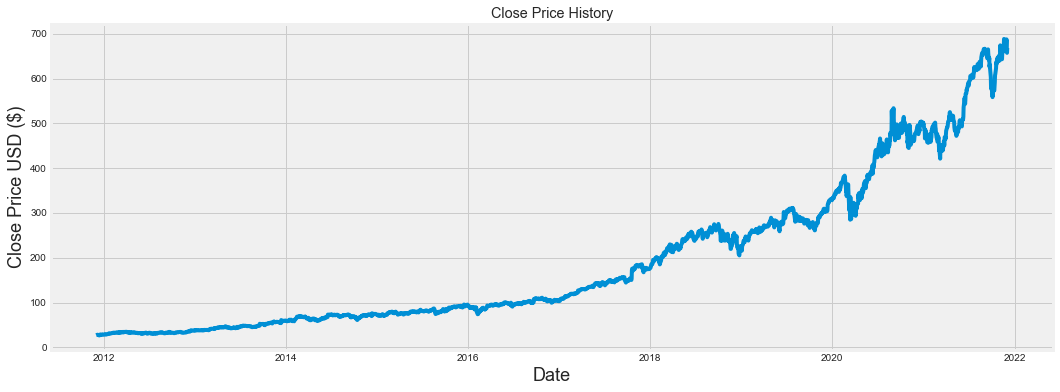

In [50]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [51]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [52]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

### ADDING SCORE INDEX
#x_train = np.c_[ x_train, getScoreColumn(score, training_data_len - 60) ]
### FINISHED ADDING SCORE INDEX

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 24s 10ms/step - loss: 6.3127e-04


In [55]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[int(training_data_len):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

### ADDING SCORE INDEX
#x_test = np.c_[ x_test, getScoreColumn(score, len(dataset) - training_data_len) ]
### FINISHED ADDING SCORE INDEX

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the MAPE 
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(mape, "%")

1.810084432646021 %


<ipython-input-56-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


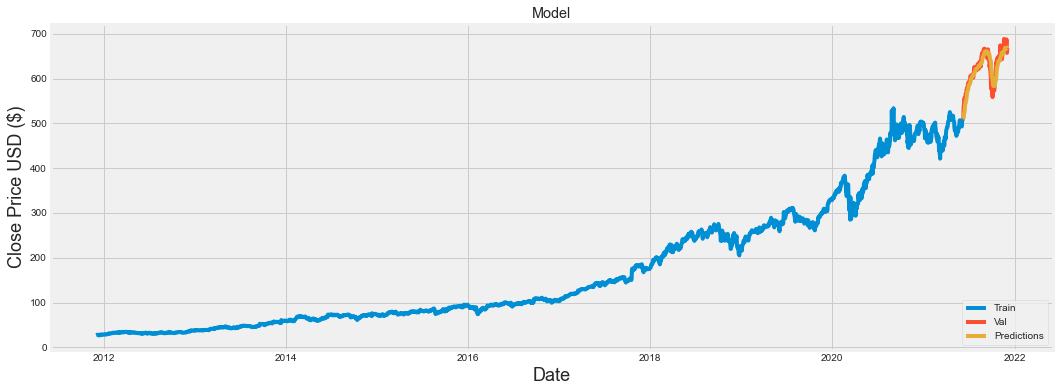

In [56]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [57]:
valid

,Close,Predictions
Date,,
2021-06-08,509.200012,510.201050
2021-06-09,514.679993,512.081360
2021-06-10,535.520020,514.586853
2021-06-11,541.260010,519.899780
2021-06-14,556.950012,526.310120
...,...,...
2021-11-26,662.099976,668.295227
2021-11-29,687.489990,666.874329
2021-11-30,669.849976,668.916687


## Finding the worst MAPE of our dataset

In [178]:
max_MAPE = 0
ALL_symbols_variables = []
ALL_symbols_variables.extend(tech_symbols_variables)
ALL_symbols_variables.extend(automobile_symbols_variables)
ALL_symbols_variables.extend(fashion_symbols_variables)
ALL_symbols_variables.extend(finance_symbols_variables)

MAPE_table = []
for i in range(len(ALL_symbols_variables)):
    df = ALL_symbols_variables[i]
    # Create a new dataframe with only the 'Close column 
    data = df.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
   # Create the training data set 
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - 60: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[int(training_data_len):, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the MAPE 
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    MAPE_table.append(mape)
    print(mape, "%")
    if mape > max_MAPE:
        max_MAPE = mape
print(max_MAPE, "%")

2332/2332 [==============================] - 36s 15ms/step - loss: 6.7477e-04
5.333091980613269 %
2332/2332 [==============================] - 38s 15ms/step - loss: 6.9219e-04
11.515590702045733 %
1663/1663 [==============================] - 26s 15ms/step - loss: 0.0020
5.6889394376280595 %
2332/2332 [==============================] - 37s 15ms/step - loss: 0.0011
8.042856082993685 %
2332/2332 [==============================] - 38s 16ms/step - loss: 0.0011
2.1052899561322103 %
2332/2332 [==============================] - 39s 16ms/step - loss: 0.0016
1.1211573461931368 %
2220/2220 [==============================] - 36s 16ms/step - loss: 9.8338e-04
2.552035464902075 %
2332/2332 [==============================] - 36s 15ms/step - loss: 0.0012
2.9638516642533914 %
2332/2332 [==============================] - 35s 15ms/step - loss: 0.0020
1.2245653808051848 %
2332/2332 [==============================] - 38s 16ms/step - loss: 0.0019
1.3163033709149818 %
2332/2332 [==============================

In [179]:
print(MAPE_table)

[5.333091980613269, 11.515590702045733, 5.6889394376280595, 8.042856082993685, 2.1052899561322103, 1.1211573461931368, 2.552035464902075, 2.9638516642533914, 1.2245653808051848, 1.3163033709149818, 10.731997442129604, 4.36236622107522, 8.12537308021677, 2.099641616250556, 2.823866176346982, 3.3273317940727973, 16.169206861242273, 3.8876804978245563, 6.3593357991642385, 1.9366037055667924, 2.5244896908690038, 5.7153265557471755, 1.2587219452412899, 5.306802653391807, 1.8663107352104085, 2.107528457611493, 0.9460323373067012, 4.722239317211486, 3.598374372515614, 2.9991976847278683, 5.577317326340996, 1.29464055358076, 1.4064212052639717, 1.9579921257238588, 4.891985597309098, 8.891440156768041, 1.2581665360690453, 2.7362216316683075, 1.780818393188282, 2.3543786264047353, 6.387643279128638, 2.61493913417415, 2.1380072828468175, 6.001116101127657, 3.5405948236239144, 4.692090685992847, 3.0629851735773403, 2.2502505777383064, 2.952658529687003, 1.9690930957499506, 6.46676557364267, 4.8099

In [191]:
print("MEAN : ", np.mean(MAPE_table), " %")

MEAN :  3.8607694820709813  %


In [192]:
print("STD : ", np.std(MAPE_table), " %")

STD :  2.6823549891212064  %


In [193]:
print("MAX : ", np.max(MAPE_table), " %")

MAX :  16.169206861242273  %


In [194]:
print("MIN : ", np.min(MAPE_table), " %")

MIN :  0.9460323373067012  %


In [195]:
MAPE_table = np.array(MAPE_table)
print("Number of Good forecasts_between 10 and 20 % :" , len(MAPE_table[MAPE_table >= 10]) )

Number of Good forecasts_between 10 and 20 % : 3


In [196]:
print("Number of Highly Accurate forecasts_between 0 and 10 % :" , len(MAPE_table[MAPE_table < 10]) )

Number of Highly Accurate forecasts_between 0 and 10 % : 75


(array([ 1., 19., 20., 10.,  8.,  6.,  7.,  0.,  3.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <BarContainer object of 18 artists>)

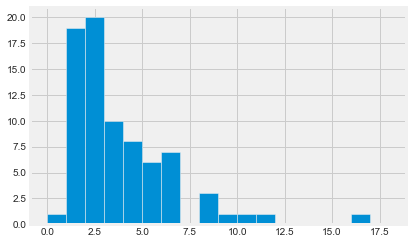

In [199]:
#histogram / distribution
plt.hist(MAPE_table, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [203]:
#Who are the Good forecast companies?
ALL_symbols = []
ALL_symbols.extend(tech_symbols)
ALL_symbols.extend(automobile_symbols)
ALL_symbols.extend(fashion_symbols)
ALL_symbols.extend(finance_symbols)

ALL_companies = []
ALL_companies.extend(companies_tech)
ALL_companies.extend(companies_automobile)
ALL_companies.extend(companies_fashion)
ALL_companies.extend(companies_finance)
for i in range(len(MAPE_table)):
    if MAPE_table[i] >= 10:
        print("MAPE is ", MAPE_table[i], " for the symbol ", ALL_symbols[i],
             " for the company ",ALL_companies[i])

MAPE is  11.515590702045733  for the symbol  AMD  for the company  AMD
MAPE is  10.731997442129604  for the symbol  MSFT  for the company  Microsoft
MAPE is  16.169206861242273  for the symbol  TME  for the company  Tencent
